# Bank Marketing

**Abstract:**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information**:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier,BaggingRegressor
import time
import datetime
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,roc_auc_score
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier




In [5]:
#importation de la dataset
dataset = pd.read_csv("bank-additional-full.csv",delimiter=';')

In [6]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
dataset['target']=dataset.y

In [9]:
dataset.y[36440]=='yes'

True

In [10]:
dataset.target[36440]

'yes'

In [11]:
dataset['target']=dataset.target.apply(lambda x:
                                       0 if x=='no'
                                       else 1)

In [12]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
1974,26,blue-collar,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
33725,33,services,single,basic.6y,unknown,yes,yes,telephone,may,wed,...,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no,0
19927,48,technician,married,university.degree,unknown,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0
24951,32,technician,divorced,professional.course,no,yes,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,0
7987,39,blue-collar,married,basic.9y,no,no,no,telephone,jun,mon,...,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,0
39399,27,student,single,unknown,no,yes,no,cellular,apr,thu,...,999,1,failure,-1.8,93.749,-34.6,0.635,5008.7,no,0
16511,36,blue-collar,married,basic.9y,no,no,no,cellular,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,0
31768,34,admin.,married,high.school,no,no,yes,cellular,may,thu,...,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no,0
3221,48,technician,married,professional.course,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
37855,62,retired,married,professional.course,no,yes,yes,cellular,aug,fri,...,999,1,failure,-2.9,92.201,-31.4,0.825,5076.2,yes,1


In [13]:
dataset.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

*result of the compaign: 11,2%*

In [14]:
# Gestion des NaN 
dataset.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
target            False
dtype: bool

In [15]:
nbcol=len(dataset.columns)
nbl=len(dataset)
nbcol

22

In [16]:
dataset.shape

(41188, 22)

In [17]:
dataset['nr.employed'].value_counts(normalize=True)

5228.1    0.394144
5099.1    0.207196
5191.0    0.188477
5195.8    0.089419
5076.2    0.040376
5017.5    0.026003
4991.6    0.018768
5008.7    0.015781
4963.6    0.015417
5023.5    0.004176
5176.3    0.000243
Name: nr.employed, dtype: float64

# MODEL

In [18]:
col=dataset.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'target'],
      dtype='object')

In [19]:
col=col.drop(['y','target'])
col

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [20]:
features_list = col
target_variable = 'target'

In [21]:
X = dataset.loc[:, features_list]
Y = dataset.loc[:, target_variable]

print('Variables explicatives : ', X.columns)
print()

Variables explicatives :  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')



In [22]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']  at positions  [0, 10, 11, 12, 13, 15, 16, 17, 18, 19]
Found categorical features  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']  at positions  [1, 2, 3, 4, 5, 6, 7, 8, 9, 14]


In [23]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [24]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[49 'blue-collar' 'married' 'basic.9y' 'unknown' 'no' 'no' 'cellular'
  'nov' 'wed' 227 4 999 0 'nonexistent' -0.1 93.2 -42.0 4.12 5195.8]
 [37 'entrepreneur' 'married' 'university.degree' 'no' 'no' 'no'
  'telephone' 'nov' 'wed' 202 2 999 1 'failure' -0.1 93.2 -42.0 4.12
  5195.8]
 [78 'retired' 'married' 'basic.4y' 'no' 'no' 'no' 'cellular' 'jul' 'mon'
  1148 1 999 0 'nonexistent' -1.7 94.215 -40.3 0.87 4991.6]
 [36 'admin.' 'married' 'university.degree' 'no' 'yes' 'no' 'telephone'
  'may' 'mon' 120 2 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]
 [59 'retired' 'divorced' 'university.degree' 'no' 'no' 'no' 'cellular'
  'jun' 'tue' 368 2 999 0 'nonexistent' -2.9 92.963 -40.8 1.262 5076.2]]
[[32 'management' 'divorced' 'university.degree' 'no' 'no' 'no'
  'cellular' 'jul' 'tue' 131 5 999 0 'nonexistent' 1.4 93.91799999999999
  -42.7 4.961 5228.1]
 [37 'unemployed' 'unknown' 'university.degree' 'no' 'no' 'no' 'cellular'
  'jun' 

In [25]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

if categorical_indices==[]:
    # Normalization
    print("just scaling")
    featureencoder = StandardScaler()
    
elif numeric_indices==[]:
    # OHE / dummyfication
    print("encoding")
    featureencoder = OneHotEncoder(drop='first') 
    
else:

    # Normalization
    numeric_transformer = StandardScaler()

    # OHE / dummyfication
    categorical_transformer = OneHotEncoder(drop='first')
    featureencoder = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_indices),    
            ('num', numeric_transformer, numeric_indices)
            ]    )

X_train = featureencoder.fit_transform(X_train)

print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          1.          1.
   0.          0.86373877 -0.12019627  0.52298128  0.19658384 -0.35012691
  -0.11485842 -0.64896664 -0.32226925  0.28896439  0.3989903 ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          1.          0.      

## DEEP LEARNING NEURAL NETWORK

In [26]:
import tensorflow as tf
from tensorflow import keras

In [144]:
full_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
full_ds

<TensorSliceDataset shapes: ((53,), ()), types: (tf.float64, tf.int64)>

In [145]:
input_shape=X_train.shape[1]
input_shape

53

In [146]:
BATCH_SIZE=3000
full_ds =full_ds.batch(BATCH_SIZE)
full_ds

<BatchDataset shapes: ((None, 53), (None,)), types: (tf.float64, tf.int64)>

In [274]:
# Balance des classes
class_weight = {
    0:1.5,
    1:5,
   }

In [275]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation="relu", input_shape=[input_shape]),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dense(8, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [276]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

# Création d'un compileur
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.binary_crossentropy,
              metrics =METRICS)

In [277]:
model.fit(full_ds, epochs=250,
          class_weight=class_weight)

Train for 11 steps
Epoch 1/250
11/11 [==============================] - 1s 104ms/step - loss: 1.3989 - tp: 3255.0000 - fp: 24677.0000 - tn: 4561.0000 - fn: 457.0000 - accuracy: 0.2372 - precision: 0.1165 - recall: 0.8769 - auc: 0.6113
Epoch 2/250
11/11 [==============================] - 0s 13ms/step - loss: 1.2359 - tp: 2171.0000 - fp: 10005.0000 - tn: 19233.0000 - fn: 1541.0000 - accuracy: 0.6496 - precision: 0.1783 - recall: 0.5849 - auc: 0.6694
Epoch 3/250
11/11 [==============================] - 0s 12ms/step - loss: 1.1180 - tp: 1565.0000 - fp: 3269.0000 - tn: 25969.0000 - fn: 2147.0000 - accuracy: 0.8356 - precision: 0.3237 - recall: 0.4216 - auc: 0.7334
Epoch 4/250
11/11 [==============================] - 0s 13ms/step - loss: 1.0010 - tp: 1560.0000 - fp: 1977.0000 - tn: 27261.0000 - fn: 2152.0000 - accuracy: 0.8747 - precision: 0.4411 - recall: 0.4203 - auc: 0.7877
Epoch 5/250
11/11 [==============================] - 0s 14ms/step - loss: 0.8857 - tp: 1796.0000 - fp: 2008.0000 - t

11/11 [==============================] - 0s 14ms/step - loss: 0.5038 - tp: 3145.0000 - fp: 3111.0000 - tn: 26127.0000 - fn: 567.0000 - accuracy: 0.8884 - precision: 0.5027 - recall: 0.8473 - auc: 0.9450
Epoch 39/250
11/11 [==============================] - 0s 12ms/step - loss: 0.5027 - tp: 3149.0000 - fp: 3113.0000 - tn: 26125.0000 - fn: 563.0000 - accuracy: 0.8884 - precision: 0.5029 - recall: 0.8483 - auc: 0.9453
Epoch 40/250
11/11 [==============================] - 0s 12ms/step - loss: 0.5015 - tp: 3153.0000 - fp: 3107.0000 - tn: 26131.0000 - fn: 559.0000 - accuracy: 0.8887 - precision: 0.5037 - recall: 0.8494 - auc: 0.9456
Epoch 41/250
11/11 [==============================] - 0s 12ms/step - loss: 0.5003 - tp: 3162.0000 - fp: 3098.0000 - tn: 26140.0000 - fn: 550.0000 - accuracy: 0.8893 - precision: 0.5051 - recall: 0.8518 - auc: 0.9458
Epoch 42/250
11/11 [==============================] - 0s 12ms/step - loss: 0.4992 - tp: 3167.0000 - fp: 3096.0000 - tn: 26142.0000 - fn: 545.0000 - a

Epoch 76/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4698 - tp: 3231.0000 - fp: 2939.0000 - tn: 26299.0000 - fn: 481.0000 - accuracy: 0.8962 - precision: 0.5237 - recall: 0.8704 - auc: 0.9519
Epoch 77/250
11/11 [==============================] - 0s 12ms/step - loss: 0.4691 - tp: 3231.0000 - fp: 2932.0000 - tn: 26306.0000 - fn: 481.0000 - accuracy: 0.8964 - precision: 0.5243 - recall: 0.8704 - auc: 0.9521
Epoch 78/250
11/11 [==============================] - 0s 14ms/step - loss: 0.4684 - tp: 3231.0000 - fp: 2930.0000 - tn: 26308.0000 - fn: 481.0000 - accuracy: 0.8965 - precision: 0.5244 - recall: 0.8704 - auc: 0.9522
Epoch 79/250
11/11 [==============================] - 0s 12ms/step - loss: 0.4678 - tp: 3233.0000 - fp: 2934.0000 - tn: 26304.0000 - fn: 479.0000 - accuracy: 0.8964 - precision: 0.5242 - recall: 0.8710 - auc: 0.9523
Epoch 80/250
11/11 [==============================] - 0s 13ms/step - loss: 0.4670 - tp: 3233.0000 - fp: 2918.0000 - tn: 26320.0000 - fn:

11/11 [==============================] - 0s 17ms/step - loss: 0.4483 - tp: 3263.0000 - fp: 2815.0000 - tn: 26423.0000 - fn: 449.0000 - accuracy: 0.9009 - precision: 0.5369 - recall: 0.8790 - auc: 0.9560
Epoch 114/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4477 - tp: 3267.0000 - fp: 2806.0000 - tn: 26432.0000 - fn: 445.0000 - accuracy: 0.9013 - precision: 0.5380 - recall: 0.8801 - auc: 0.9561
Epoch 115/250
11/11 [==============================] - 0s 14ms/step - loss: 0.4472 - tp: 3270.0000 - fp: 2798.0000 - tn: 26440.0000 - fn: 442.0000 - accuracy: 0.9017 - precision: 0.5389 - recall: 0.8809 - auc: 0.9562
Epoch 116/250
11/11 [==============================] - 0s 16ms/step - loss: 0.4467 - tp: 3270.0000 - fp: 2794.0000 - tn: 26444.0000 - fn: 442.0000 - accuracy: 0.9018 - precision: 0.5392 - recall: 0.8809 - auc: 0.9563
Epoch 117/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4461 - tp: 3272.0000 - fp: 2797.0000 - tn: 26441.0000 - fn: 440.0000

11/11 [==============================] - 0s 16ms/step - loss: 0.4309 - tp: 3289.0000 - fp: 2690.0000 - tn: 26548.0000 - fn: 423.0000 - accuracy: 0.9055 - precision: 0.5501 - recall: 0.8860 - auc: 0.9590
Epoch 151/250
11/11 [==============================] - 0s 16ms/step - loss: 0.4305 - tp: 3286.0000 - fp: 2684.0000 - tn: 26554.0000 - fn: 426.0000 - accuracy: 0.9056 - precision: 0.5504 - recall: 0.8852 - auc: 0.9590
Epoch 152/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4301 - tp: 3288.0000 - fp: 2685.0000 - tn: 26553.0000 - fn: 424.0000 - accuracy: 0.9056 - precision: 0.5505 - recall: 0.8858 - auc: 0.9591
Epoch 153/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4296 - tp: 3295.0000 - fp: 2681.0000 - tn: 26557.0000 - fn: 417.0000 - accuracy: 0.9060 - precision: 0.5514 - recall: 0.8877 - auc: 0.9592
Epoch 154/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4292 - tp: 3290.0000 - fp: 2678.0000 - tn: 26560.0000 - fn: 422.0000

11/11 [==============================] - 0s 16ms/step - loss: 0.4152 - tp: 3304.0000 - fp: 2562.0000 - tn: 26676.0000 - fn: 408.0000 - accuracy: 0.9099 - precision: 0.5632 - recall: 0.8901 - auc: 0.9616
Epoch 188/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4147 - tp: 3306.0000 - fp: 2561.0000 - tn: 26677.0000 - fn: 406.0000 - accuracy: 0.9100 - precision: 0.5635 - recall: 0.8906 - auc: 0.9617
Epoch 189/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4142 - tp: 3308.0000 - fp: 2557.0000 - tn: 26681.0000 - fn: 404.0000 - accuracy: 0.9101 - precision: 0.5640 - recall: 0.8912 - auc: 0.9618
Epoch 190/250
11/11 [==============================] - 0s 16ms/step - loss: 0.4136 - tp: 3309.0000 - fp: 2554.0000 - tn: 26684.0000 - fn: 403.0000 - accuracy: 0.9103 - precision: 0.5644 - recall: 0.8914 - auc: 0.9619
Epoch 191/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4133 - tp: 3309.0000 - fp: 2558.0000 - tn: 26680.0000 - fn: 403.0000

11/11 [==============================] - 0s 17ms/step - loss: 0.4005 - tp: 3333.0000 - fp: 2499.0000 - tn: 26739.0000 - fn: 379.0000 - accuracy: 0.9127 - precision: 0.5715 - recall: 0.8979 - auc: 0.9639
Epoch 225/250
11/11 [==============================] - 0s 15ms/step - loss: 0.4002 - tp: 3338.0000 - fp: 2487.0000 - tn: 26751.0000 - fn: 374.0000 - accuracy: 0.9132 - precision: 0.5730 - recall: 0.8992 - auc: 0.9639
Epoch 226/250
11/11 [==============================] - 0s 15ms/step - loss: 0.3998 - tp: 3336.0000 - fp: 2478.0000 - tn: 26760.0000 - fn: 376.0000 - accuracy: 0.9134 - precision: 0.5738 - recall: 0.8987 - auc: 0.9640
Epoch 227/250
11/11 [==============================] - 0s 15ms/step - loss: 0.3995 - tp: 3336.0000 - fp: 2488.0000 - tn: 26750.0000 - fn: 376.0000 - accuracy: 0.9131 - precision: 0.5728 - recall: 0.8987 - auc: 0.9641
Epoch 228/250
11/11 [==============================] - 0s 15ms/step - loss: 0.3993 - tp: 3337.0000 - fp: 2481.0000 - tn: 26757.0000 - fn: 375.0000

In [278]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [279]:
def plot_cm(labels, predictions, p=0.5):
    
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Prospects not contacted and not captive (True Negatives): ', cm[0][0])
  print('refused the offer (False Positives): ', cm[0][1])
  print('Potential customers missed (False Negatives): ', cm[1][0])
  print('Prospect accepted the offer (True Positives): ', cm[1][1])
  print("converstion rate:",cm[1][1]/(cm[1][1]+cm[0][1]))  
  print(''
    
       
       )



loss :  0.21571880374958458
tp :  737.0
fp :  641.0
tn :  6669.0
fn :  191.0
accuracy :  0.89900464
precision :  0.5348331
recall :  0.79418105
auc :  0.9406796

Prospects not contacted and not captive (True Negatives):  6669
refused the offer (False Positives):  641
Potential customers missed (False Negatives):  191
Prospect accepted the offer (True Positives):  737
converstion rate: 0.534833091436865



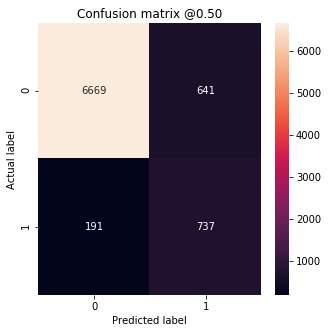

In [280]:
baseline_results = model.evaluate(X_test,Y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()


plot_cm(Y_test, test_predictions_baseline)

